In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [68]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
# Finding the csv from the league
# Multi League directory
country = 'MX'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'ligaMX_2.csv'
csv_file = dirCountry + file_title
df_one = pd.read_csv(csv_file)
file_title = 'ligamx_2019.csv'
csv_file = dirCountry + file_title
df_two = pd.read_csv(csv_file)
df_one = df_one.drop(columns=["league","id"], axis=1)
df_two["season"] = np.full(df_two.shape[0], 2019)
df_two["week"] = np.full(df_two.shape[0], 28)
df_one["week"] = df_one["week"].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [70]:
# Testing against current season
current_season = 2020

In [71]:
# Retrieving previous saved data
df_laliga = df_one.append(df_two)
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [72]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [73]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [74]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [75]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    goals_home = r["goals_fhome"] + r["goals_shome"]
    goals_away = r["goals_faway"] + r["goals_saway"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [76]:
def get_status(r):
    goals_home = r["goals_home"]
    goals_away = r["goals_away"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [77]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,2,0,0


In [78]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
description = np.append(description, np.unique(df_laliga["team_away.description"].astype(str)))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,2,0,0


In [79]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,2,0,0


In [80]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [81]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [82]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,2,0,0


In [83]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0,0.0,0.0,0,2,0,2,0,0


In [84]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,2,0,0


In [85]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)
df_premise.head()

(410, 111)


,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,0,1,1
1,14,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
2,8,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,0,1
3,16,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,2,0,0


In [86]:
"""
    Here the unseen data will be built as test set - Liga Mx
"""
p37 = [[2292, 2290], [2280, 2279], [2288, 2287], [14002, 2281], [2295, 2289], [2282, 2285],
       [2278, 2291], [2286, 2298], [2314, 2283]]

In [87]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,1.0,0.0,2020,2292,Pachuca,14,1,-1,DL,...,21.0,0.70,1.0,-1.0,0,1,1,0,1,1
103,28,1.0,1.0,2019,2292,Pachuca,11,14,-1,LWDWW,...,301.0,0.80,0.0,0.0,3,1,1,1,2,2
32,3,0.0,0.0,2020,2280,Club Tijuana,11,3,-2,LW,...,0.0,0.00,0.0,0.0,1,1,0,1,0,1
43,28,1.0,1.0,2019,2280,Club Tijuana,16,9,-6,WLLLD,...,415.0,0.87,0.0,0.0,1,3,1,2,2,1
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.00,0.0,0.0,0,2,0,2,0,0


In [88]:
# Getting previous record
weeks = [3]
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["week"].isin(weeks))])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["week"].isin(weeks))])
ts_premise.head()

,week,goals_home,goals_away,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,1.0,0.0,2020,2292,Pachuca,14,1,-1,DL,...,21.0,0.7,1.0,-1.0,0,1,1,0,1,1
32,3,0.0,0.0,2020,2280,Club Tijuana,11,3,-2,LW,...,0.0,0.0,0.0,0.0,1,1,0,1,0,1
4,3,0.0,0.0,2020,2288,Necaxa,18,0,-4,LL,...,0.0,0.0,0.0,0.0,0,2,0,2,0,0
78,3,0.0,0.0,2020,14002,Mazatlán,16,1,-3,DL,...,0.0,0.0,0.0,0.0,0,1,1,1,1,0
74,3,0.0,0.0,2020,2295,Cruz Azul,5,4,2,DW,...,0.0,0.0,0.0,0.0,1,0,1,1,0,1


In [89]:
print(ts_laliga.shape)
print(ts_premise.shape)

(9, 128)
(9, 111)


In [90]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(410, 124)


In [91]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [92]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(381, 124)
(381, 107)


In [93]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 1, -1, -1, 1, 1, 0, 0, -1, 1, 1, 0, 1, 1, 1, -1, 1, 0, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 0, 1, -1, 1, -1, 0, 0, 1, -1, 0, 0, 0, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 0, 0, 1, -1, 1, 1, -1, 1, 1, -1, -1, 0, 0, 1, 0, 1, -1, 1, 1, 1, 1, 0, 1, 1, 0, -1, -1, 1, -1, -1, 1, -1, -1, 1, 0, -1, 1, 1, -1, -1, 0, -1, 1, 1, 1, 1, 1, -1, -1, 0, -1, -1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 0, -1, 1, 1, 1, -1, 1, 1, 0, 0, 0, 0, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, -1, -1, 1, 0, -1, -1, 1, 1, 1, 0, 0, 1, -1, -1, -1, -1, -1,

In [94]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(381, 120)


In [95]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
#avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                          
2278              2019             5.076923            5.153846   
                  2020             1.000000            1.666667   
2279              2019             4.800000            6.000000   
                  2020             0.000000            0.000000   
2280              2019             4.615385            6.230769   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
2278              2019          13.615385          3.384615   
                  2020           3.222222          0.555556   
2279              2019          14.400000          3.600000   
                  2020           0.000000          0.000000   
2280              2019          13.461538          2.615385   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
2278              2019              6.923077              6.692308   
                  2020              1.888889              1.333333   
2279              2019              8.333333              6.066667   
                  2020              0.000000              0.000000   
2280              2019              7.461538              6.000000   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
2278              2019           12.846154            5.230769   
                  2020            3.111111            0.222222   
2279              2019           13.066667            5.333333   
                  2020            0.000000            0.000000   
2280              2019           15.846154            4.384615   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
2278              2019              0.923077               0.543846   
                  2020              0.111111               0.100000   
2279              2019              1.666667               0.611333   
                  2020              0.000000               0.000000   
2280              2019              2.615385               0.493077   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
2278              2019               2.230769          0.307692   
                  2020               0.555556          0.000000   
2279              2019               1.133333          0.000000   
                  2020               0.000000          0.000000   
2280              2019               2.769231          0.538462   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
2278              2019            2.153846          422.846154   
                  2020            0.777778           85.444444   
2279              2019            2.266667          502.000000   
                  2020            0.000000            0.000000   
2280              2019            1.846154          357.769231   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
2278              2019               353.615385                 0.829231  
                  2020                69.333333                 0.180000  
2279              2019               433.666667                 0.857333  
                  2020                 0.000000                 0.000000  
2280              2019               277.230769                 0.766154

In [96]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [424]:
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
488,6.162162,6.162162,16.486486,4.162162,10.162162,6.324324,11.864865,6.189189,1.729730,0.518108,2.216216,0.054054,3.000000,484.702703,410.378378,0.820270
489,3.736842,6.368421,14.526316,4.421053,8.263158,6.263158,13.684211,4.315789,1.368421,0.491053,2.578947,0.105263,3.684211,427.526316,348.842105,0.808947
492,5.470588,8.088235,17.705882,4.147059,10.147059,7.558824,12.970588,5.911765,1.764706,0.512353,2.000000,0.058824,2.764706,483.882353,410.882353,0.834118
493,4.156250,5.187500,12.375000,3.031250,7.218750,5.156250,15.062500,4.656250,1.500000,0.452188,2.375000,0.093750,3.093750,411.875000,337.125000,0.811562
495,3.625000,6.875000,13.750000,3.250000,7.625000,6.125000,13.000000,6.000000,1.125000,0.541250,2.375000,0.000000,3.125000,471.375000,387.125000,0.805000


In [97]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
#avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

stats_away.s_on_g  stats_away.s_off_g  \
team_away.team.id season                                          
2278              2019             4.000000            4.923077   
                  2020             0.625000            1.125000   
2279              2019             3.333333            4.833333   
                  2020             0.714286            0.714286   
2280              2019             2.909091            5.000000   
                  2020             0.250000            0.375000   
2281              2019             2.923077            4.538462   
                  2020             0.625000            0.750000   
2282              2019             4.533333            5.600000   
                  2020             0.111111            0.888889   

                          stats_away.s_in  stats_away.s_out  \
team_away.team.id season                                      
2278              2019          11.769231          2.846154   
                  2020           1.750000          0.000000   
2279              2019          10.750000          2.583333   
                  2020           2.428571          1.000000   
2280              2019          10.727273          2.818182   
                  2020           0.875000          0.250000   
2281              2019          10.000000          2.538462   
                  2020           1.375000          0.000000   
2282              2019          13.866667          3.733333   
                  2020           1.444444          0.444444   

                          stats_away.s_total  stats_away.s_blocked  \
team_away.team.id season                                             
2278              2019              6.076923              5.692308   
                  2020              1.125000              0.625000   
2279              2019              5.166667              5.583333   
                  2020              1.142857              1.285714   
2280              2019              5.272727              5.454545   
                  2020              0.500000              0.375000   
2281              2019              4.615385              5.384615   
                  2020              0.625000              0.750000   
2282              2019              8.533333              5.333333   
                  2020              0.666667              0.777778   

                          stats_away.fouls  stats_away.corners  \
team_away.team.id season                                         
2278              2019           12.230769            5.230769   
                  2020            1.375000            0.500000   
2279              2019           12.333333            4.583333   
                  2020            2.428571            0.857143   
2280              2019           13.272727            4.090909   
                  2020            1.875000            0.375000   
2281              2019           13.846154            4.846154   
                  2020            1.750000            0.250000   
2282              2019           14.133333            6.066667   
                  2020            2.000000            0.666667   

                          stats_away.offside  stats_away.possession  \
team_away.team.id season                                              
2278              2019              0.923077               0.525385   
                  2020              0.125000               0.075000   
2279              2019              2.166667               0.579167   
                  2020              0.142857               0.085714   
2280              2019              1.363636               0.451818   
                  2020              0.125000               0.065000   
2281              2019              0.923077               0.404615   
                  2020              0.000000               0.065000   
2282              2019              2.066667               0.507333   
                  2020              0.111111     

In [98]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [103]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        # getting just current season
        if ts_laliga.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,2020,2292,14,1,-1,0,1,1,0,...,0.250000,38.000000,29.000000,0.095000,0,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,1,1,...,0.142857,78.142857,67.714286,0.124286,1,1,0,1,0,1
4,3,2020,2288,18,0,-4,0,1,1,0,...,0.285714,49.857143,41.142857,0.118571,0,2,0,2,0,0
78,3,2020,14002,16,1,-3,0,1,1,0,...,0.375000,49.750000,41.625000,0.105000,0,1,1,1,1,0
74,3,2020,2295,5,4,2,2,1,1,1,...,0.500000,65.000000,55.875000,0.107500,1,0,1,1,0,1
97,3,2020,2282,8,3,1,2,1,1,1,...,0.500000,31.125000,21.375000,0.086250,1,1,0,1,1,0
92,3,2020,2278,15,1,-2,0,1,1,0,...,0.000000,0.000000,0.000000,0.000000,0,1,1,1,0,1
14,3,2020,2286,2,6,2,1,1,1,1,...,0.285714,50.142857,39.142857,0.111429,2,0,0,1,0,1
60,3,2020,2314,12,1,-1,2,1,1,0,...,0.250000,44.125000,34.750000,0.098750,0,1,1,0,2,0


In [104]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,2020,2292,14,1,-1,0,1,1,0,...,0.250000,38.000000,29.000000,0.095000,0,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,1,1,...,0.142857,78.142857,67.714286,0.124286,1,1,0,1,0,1
4,3,2020,2288,18,0,-4,0,1,1,0,...,0.285714,49.857143,41.142857,0.118571,0,2,0,2,0,0
78,3,2020,14002,16,1,-3,0,1,1,0,...,0.375000,49.750000,41.625000,0.105000,0,1,1,1,1,0
74,3,2020,2295,5,4,2,2,1,1,1,...,0.500000,65.000000,55.875000,0.107500,1,0,1,1,0,1
97,3,2020,2282,8,3,1,2,1,1,1,...,0.500000,31.125000,21.375000,0.086250,1,1,0,1,1,0
92,3,2020,2278,15,1,-2,0,1,1,0,...,0.000000,0.000000,0.000000,0.000000,0,1,1,1,0,1
14,3,2020,2286,2,6,2,1,1,1,1,...,0.285714,50.142857,39.142857,0.111429,2,0,0,1,0,1
60,3,2020,2314,12,1,-1,2,1,1,0,...,0.250000,44.125000,34.750000,0.098750,0,1,1,0,2,0


In [105]:
# Drop ids
df_laliga = df_laliga.drop(columns=["team_home.group","team_away.group", 
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played","team_home.stats_home.played"])

(381, 114)


In [106]:
ts_laliga = ts_laliga.drop(columns=["team_home.group","team_away.group",
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
ts_premise = ts_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played", "team_home.stats_home.played"])

In [351]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [107]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [109]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [110]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=9)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [111]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.65053545 0.08724613 0.07487914 0.04377411 0.0393549  0.03268521
 0.02919105 0.02168067 0.02065334]


In [112]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.72621445 0.09739577 0.08359008 0.04886651 0.04393319]


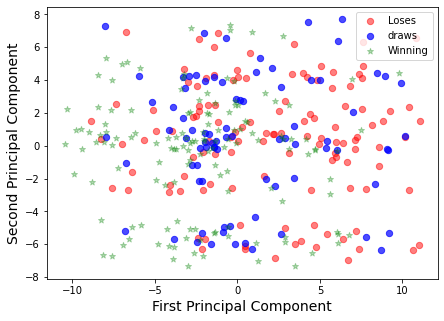

In [358]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


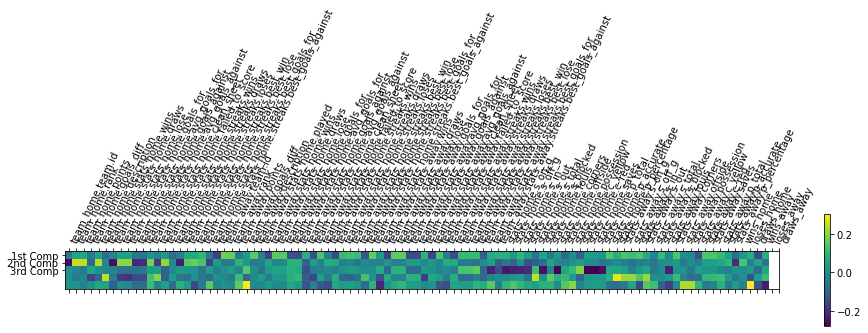

In [359]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [113]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto', probability=True)
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
63,3,2020,2292,14,1,-1,0,0,0,1,...,38.000000,29.000000,0.095000,0,1,1,0,1,1,-1
32,3,2020,2280,11,3,-2,2,1,0,0,...,78.142857,67.714286,0.124286,1,1,0,1,0,1,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,49.857143,41.142857,0.118571,0,2,0,2,0,0,-1
78,3,2020,14002,16,1,-3,0,0,0,1,...,49.750000,41.625000,0.105000,0,1,1,1,1,0,0
74,3,2020,2295,5,4,2,2,1,0,0,...,65.000000,55.875000,0.107500,1,0,1,1,0,1,1


In [114]:
print(results_premise["svm"])

63   -1
32    1
4    -1
78    0
74    1
97    0
92    1
14    1
60    1
Name: svm, dtype: int64


In [115]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
63,3,2020,2292,14,1,-1,0,0,0,1,...,38.000000,29.000000,0.095000,0,1,1,0,1,1,-1
32,3,2020,2280,11,3,-2,2,1,0,0,...,78.142857,67.714286,0.124286,1,1,0,1,0,1,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,49.857143,41.142857,0.118571,0,2,0,2,0,0,-1
78,3,2020,14002,16,1,-3,0,0,0,1,...,49.750000,41.625000,0.105000,0,1,1,1,1,0,0
74,3,2020,2295,5,4,2,2,1,0,0,...,65.000000,55.875000,0.107500,1,0,1,1,0,1,1


In [116]:
print(results_laliga["svm"])

63   -1
32    1
4    -1
78    0
74    1
97    0
92    1
14    1
60    1
Name: svm, dtype: int64


In [117]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

63    1
32    1
4     1
78    1
74    1
97    1
92    1
14    1
60    1
Name: svm_pca_fi, dtype: int64
63    1
32    1
4     1
78    1
74    1
97    1
92    1
14    1
60    0
Name: svm_pca_tw, dtype: int64


In [118]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

63    1
32    1
4     1
78    1
74    1
97    1
92    1
14    1
60    1
Name: svm_pca_fi, dtype: int64
63    1
32    1
4     1
78    1
74    0
97    1
92    1
14    0
60    1
Name: svm_pca_tw, dtype: int64


In [119]:
df_premise.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,0,1,1
1,14,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
2,8,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,0,1
3,16,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
5,6,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0


In [120]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [121]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
63,3,2020,2292,14,1,-1,0,0,0,1,...,0,1,1,0,1,1,-1,1,1,0
32,3,2020,2280,11,3,-2,2,1,0,0,...,1,1,0,1,0,1,1,1,1,0
4,3,2020,2288,18,0,-4,0,0,0,1,...,0,2,0,2,0,0,-1,1,1,0
78,3,2020,14002,16,1,-3,0,0,0,1,...,0,1,1,1,1,0,0,1,1,0
74,3,2020,2295,5,4,2,2,1,0,0,...,1,0,1,1,0,1,1,1,0,0


In [370]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [122]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
63,3,2020,2292,14,1,-1,0,0,0,1,...,1,0,1,1,-1,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,0,0,...,0,1,0,1,1,1,1,0,0,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,0,2,0,0,-1,1,1,0,1,1
78,3,2020,14002,16,1,-3,0,0,0,1,...,1,1,1,0,0,1,1,0,1,1
74,3,2020,2295,5,4,2,2,1,0,0,...,1,1,0,1,1,1,1,0,0,0
97,3,2020,2282,8,3,1,2,1,0,0,...,0,1,1,0,0,1,1,0,1,1
92,3,2020,2278,15,1,-2,0,0,1,0,...,1,1,0,1,1,1,1,0,-1,-1
14,3,2020,2286,2,6,2,1,1,0,0,...,0,1,0,1,1,1,1,0,0,0
60,3,2020,2314,12,1,-1,2,0,1,0,...,1,0,2,0,1,1,0,0,-1,-1


In [123]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
63,3,2020,2292,14,1,-1,0,0,0,1,...,1,0,1,1,-1,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,0,0,...,0,1,0,1,1,1,1,0,1,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,0,2,0,0,-1,1,1,0,-1,-1
78,3,2020,14002,16,1,-3,0,0,0,1,...,1,1,1,0,0,1,1,0,1,1
74,3,2020,2295,5,4,2,2,1,0,0,...,1,1,0,1,1,1,0,0,0,0


In [373]:
"""
    Feature Selection:
    Test against ANOVA f-score
"""

'\n    Feature Selection:\n    Test against ANOVA f-score\n'

In [124]:
from sklearn.feature_selection import SelectKBest, f_classif

In [125]:
# Using ANOVA f-score
best_features_premise = SelectKBest(f_classif, k=20).fit(df_premise, label)
best_features = SelectKBest(f_classif, k=20).fit(df_laliga, label)
df_chi = best_features.transform(df_laliga)
premise_chi = best_features_premise.transform(df_premise)
ts_chi = best_features.transform(ts_laliga)
ts_premise_chi = best_features_premise.transform(ts_premise)

In [126]:
# Using Gaussian Naive Bayes and chi-squared
gnb_p_chi = GaussianNB()
gnb_p_chi.fit(premise_chi, label)
results_premise["nb_fval"] = gnb_p_chi.predict(ts_premise_chi)
gnb_chi = GaussianNB()
gnb_chi.fit(df_chi, label)
results_laliga["nb_fval"] = gnb_chi.predict(ts_chi)
results_premise.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval
63,3,2020,2292,14,1,-1,0,0,0,1,...,0,1,1,-1,1,1,0,1,1,0
32,3,2020,2280,11,3,-2,2,1,0,0,...,1,0,1,1,1,1,0,0,1,0
4,3,2020,2288,18,0,-4,0,0,0,1,...,2,0,0,-1,1,1,0,1,1,0
78,3,2020,14002,16,1,-3,0,0,0,1,...,1,1,0,0,1,1,0,1,1,0
74,3,2020,2295,5,4,2,2,1,0,0,...,1,0,1,1,1,1,0,0,0,0
97,3,2020,2282,8,3,1,2,1,0,0,...,1,1,0,0,1,1,0,1,1,0
92,3,2020,2278,15,1,-2,0,0,1,0,...,1,0,1,1,1,1,0,-1,-1,0
14,3,2020,2286,2,6,2,1,1,0,0,...,1,0,1,1,1,1,0,0,0,0
60,3,2020,2314,12,1,-1,2,0,1,0,...,0,2,0,1,1,0,0,-1,-1,0


In [127]:
# Using Random Forests for Training with all Features
from sklearn.ensemble import RandomForestClassifier
# At least two matches en each classification per week
premise_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_premise, label)
results_premise["rf"] = premise_clf.predict(ts_premise)
laliga_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_laliga, label)
results_laliga["rf"] = laliga_clf.predict(ts_laliga)

In [128]:
df_premise.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,4,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,0,1,1
1,14,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
2,8,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,0,1
3,16,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0
5,6,2020,2288,18,0,-4,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2,0,1,1,0


In [451]:
importances = premise_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in premise_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

columns_name = df_laliga.columns

for f in range(df_laliga.shape[1]):
    print("%d. feature %s %d (%f)" % (f + 1, columns_name[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_laliga.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(df_laliga.shape[1]), indices)
plt.xlim([-1, df_laliga.shape[1]])
plt.show()

Feature ranking:
1. feature stats_home.s_off_g 75 (0.053537)
2. feature team_away.stats_away.draws 59 (0.041983)
3. feature stats_home.s_blocked 79 (0.024199)
4. feature team_away.stats_away.streaks.best_goals_for 72 (0.023544)
5. feature team_away.stats_away.streaks.best_goals_against 73 (0.022756)
6. feature team_away.stats_away.goals_against 63 (0.022556)
7. feature stats_home.p_accurate 88 (0.022305)
8. feature team_away.stats_away.goals_for 61 (0.022038)
9. feature stats_home.p_percentage 89 (0.020832)
10. feature team_away.stats_away.streaks.draws 68 (0.020626)
11. feature stats_home.s_out 77 (0.020408)
12. feature stats_home.corners 81 (0.020281)
13. feature stats_home.s_on_g 74 (0.020173)
14. feature stats_home.s_in 76 (0.018646)
15. feature team_away.stats_away.avg_goals_against 64 (0.017948)
16. feature stats_home.c_yellow 84 (0.017807)
17. feature team_away.stats_away.clean_sheet 65 (0.017618)
18. feature team_away.stats_away.failed_to_score 66 (0.017052)
19. feature stats_a

IndexError: index 97 is out of bounds for axis 0 with size 97

In [395]:
print(premise_clf.predict_proba(ts_premise)[5])
print(premise_clf.predict_proba(ts_premise)[8])

[0.31807143 0.14607143 0.53585714]
[0.429     0.1962619 0.3747381]


In [129]:
ts_premise.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,2020,2292,14,1,-1,0,0,0,1,...,0.250000,38.000000,29.000000,0.095000,0,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,0,0,...,0.142857,78.142857,67.714286,0.124286,1,1,0,1,0,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,0.285714,49.857143,41.142857,0.118571,0,2,0,2,0,0
78,3,2020,14002,16,1,-3,0,0,0,1,...,0.375000,49.750000,41.625000,0.105000,0,1,1,1,1,0
74,3,2020,2295,5,4,2,2,1,0,0,...,0.500000,65.000000,55.875000,0.107500,1,0,1,1,0,1
97,3,2020,2282,8,3,1,2,1,0,0,...,0.500000,31.125000,21.375000,0.086250,1,1,0,1,1,0
92,3,2020,2278,15,1,-2,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0,1,1,1,0,1
14,3,2020,2286,2,6,2,1,1,0,0,...,0.285714,50.142857,39.142857,0.111429,2,0,0,1,0,1
60,3,2020,2314,12,1,-1,2,0,1,0,...,0.250000,44.125000,34.750000,0.098750,0,1,1,0,2,0


In [130]:
ts_premise.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
63,3,2020,2292,14,1,-1,0,0,0,1,...,0.250000,38.000000,29.000000,0.095000,0,1,1,0,1,1
32,3,2020,2280,11,3,-2,2,1,0,0,...,0.142857,78.142857,67.714286,0.124286,1,1,0,1,0,1
4,3,2020,2288,18,0,-4,0,0,0,1,...,0.285714,49.857143,41.142857,0.118571,0,2,0,2,0,0
78,3,2020,14002,16,1,-3,0,0,0,1,...,0.375000,49.750000,41.625000,0.105000,0,1,1,1,1,0
74,3,2020,2295,5,4,2,2,1,0,0,...,0.500000,65.000000,55.875000,0.107500,1,0,1,1,0,1


In [131]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    if x["nb_fval"] == result:
        count = count + 1
    if x["rf"] == result:
        count = count + 1
    return count/5

In [132]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
63,3,2020,2292,14,1,-1,0,0,0,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
32,3,2020,2280,11,3,-2,2,1,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
4,3,2020,2288,18,0,-4,0,0,0,1,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
78,3,2020,14002,16,1,-3,0,0,0,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
74,3,2020,2295,5,4,2,2,1,0,0,...,1,0,0,0,0,0,0,0.0,1.0,0.0


In [133]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,week,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
63,3,2020,2292,14,1,-1,0,0,0,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
32,3,2020,2280,11,3,-2,2,1,0,0,...,1,1,0,0,1,0,0,0.2,0.8,0.0
4,3,2020,2288,18,0,-4,0,0,0,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
78,3,2020,14002,16,1,-3,0,0,0,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
74,3,2020,2295,5,4,2,2,1,0,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
97,3,2020,2282,8,3,1,2,1,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
92,3,2020,2278,15,1,-2,0,0,1,0,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
14,3,2020,2286,2,6,2,1,1,0,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
60,3,2020,2314,12,1,-1,2,0,1,0,...,1,0,0,-1,-1,0,0,0.0,0.6,0.4


In [134]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [135]:
# csv to save
file_title = 'ligamx_p3.csv'
results_file = dirCountry + file_title
file_title = 'premise_p3.csv'
results_premise_file = dirCountry + file_title

In [136]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [208]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [499]:
# Testing Gaussian Clustering

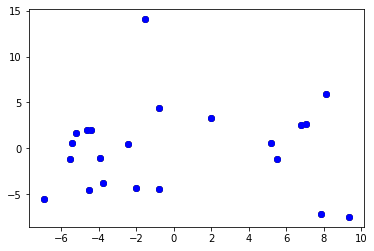

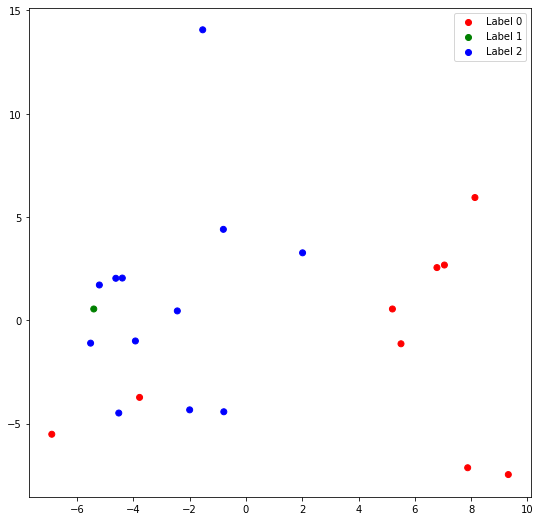

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

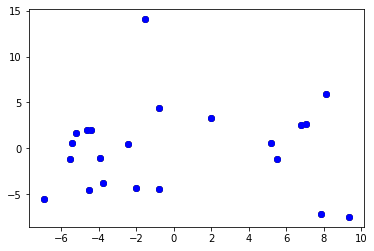

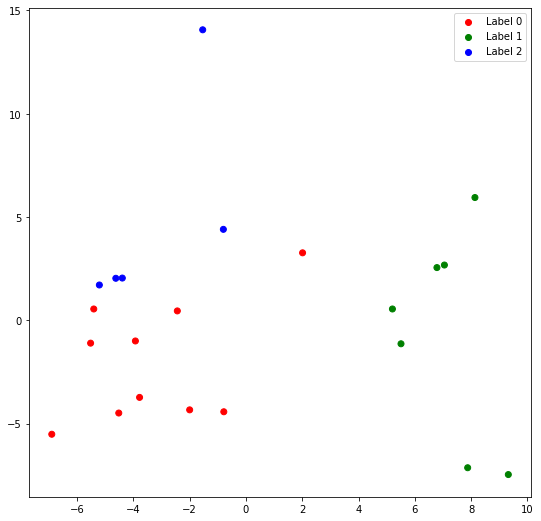

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

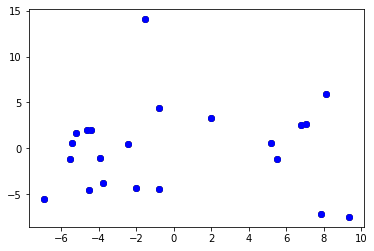

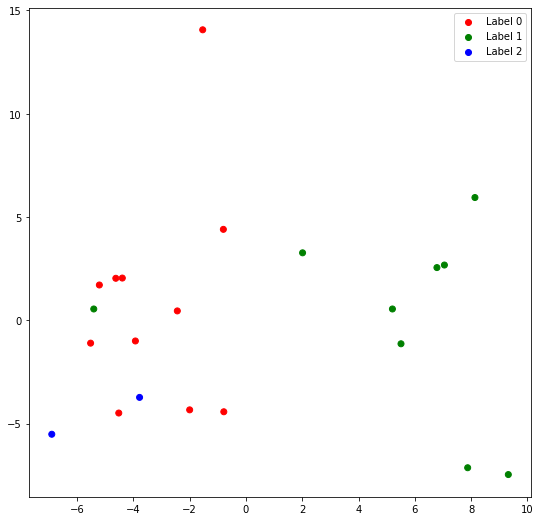

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 